## Import des librairies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database',)).History will not be written to the database.


## Chargement des données

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Exploration des données 

Comparaison des jeux de données 

In [5]:
df_train.shape,df_test.shape

((1460, 81), (1459, 80))

### Vérification de l'unicité des ID

In [6]:
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


### Les corrélations indiquent si deux variables sont linéairement équivalentes. (donc si elles sont importantes)

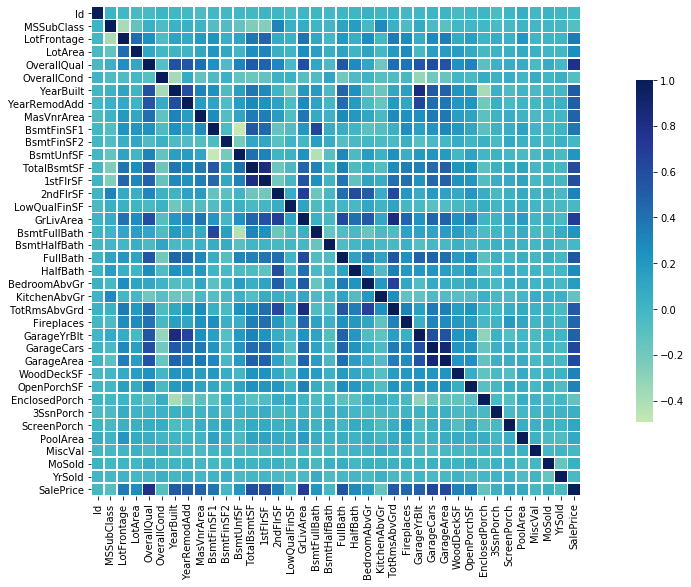

In [7]:
#correlation matrix
corr = df_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5,cmap="YlGnBu", cbar_kws={"shrink": .70})

### Trouvez les fonctionnalités les plus importantes par rapport au "SalePrice"

In [8]:
print("Find most important features relative to SalePrice")
corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)


Find most important features relative to SalePrice
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch

In [9]:
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.4]
top_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [10]:
df_test_id = df_test["Id"]
df_train_id = df_train["Id"]
df_train = df_train.filter(items=top_corr_features)
df_test = df_test.filter(items=top_corr_features)

### Visualisation des colonnes choisies

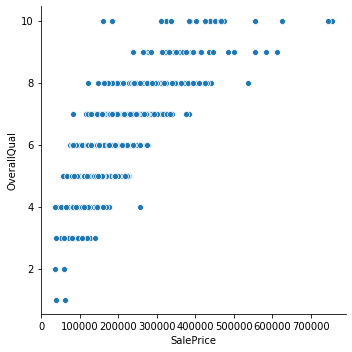

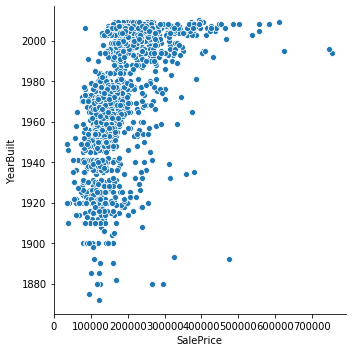

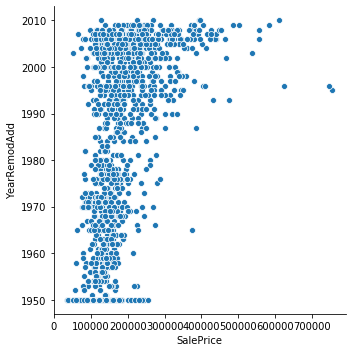

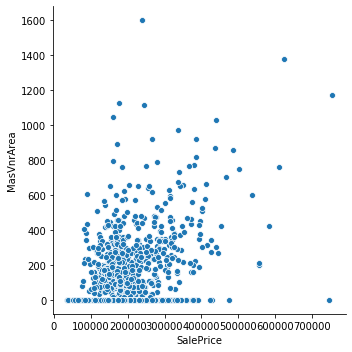

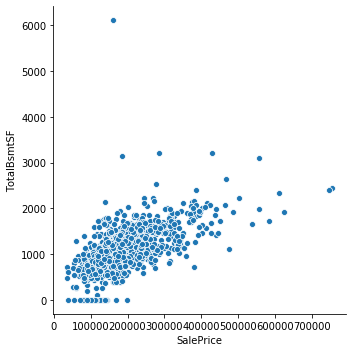

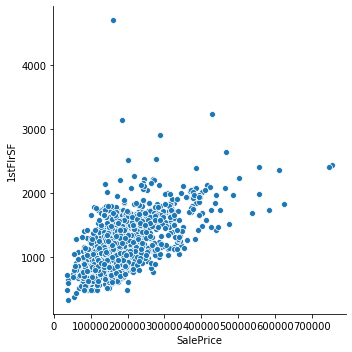

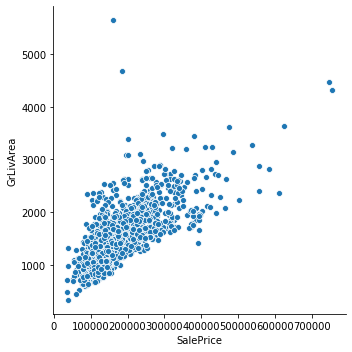

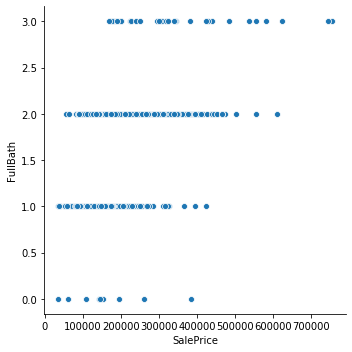

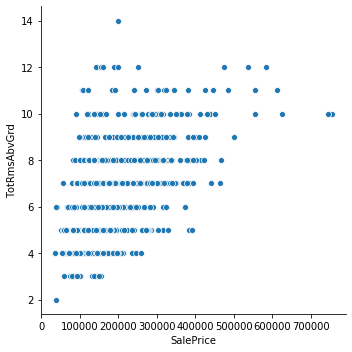

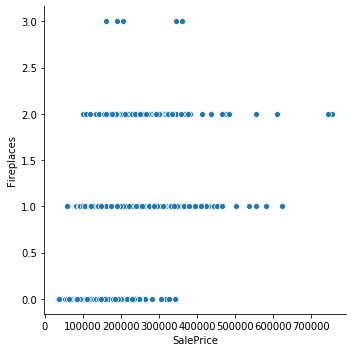

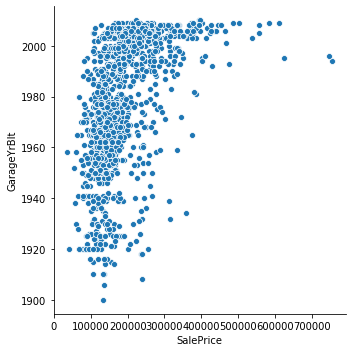

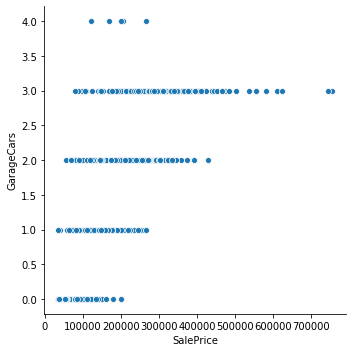

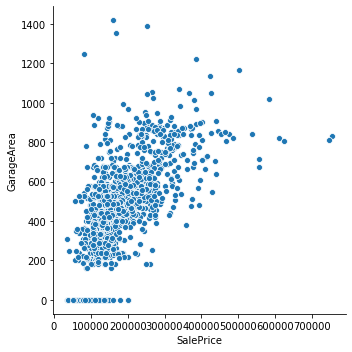

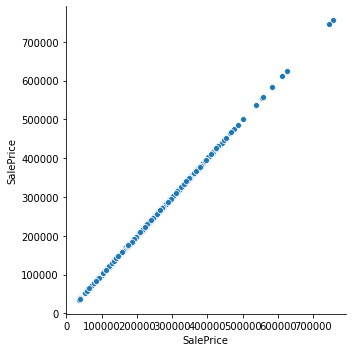

In [11]:
for col in top_corr_features:
    sns.relplot(x="SalePrice", y=col, data=df_train)

## Traitement des données
Nous avons des colonnes qui contiennent des NAN, il va falloir qu'on les remplace

### Pré-traitement

### suppression des colonnes >90% de valeurs null

In [12]:
df_train.dropna(thresh=len(df_train)*0.9, axis=1)
df_test.dropna(thresh=len(df_test)*0.9, axis=1)

df_train.shape,df_test.shape

((1460, 14), (1459, 13))

### Différencier les caractéristiques numériques (moins la 'SalePrice') et les caractéristiques catégorielles ("objets")

In [13]:
df_train_nan = df_train.isnull().sum()
df_train_nan = df_train_nan[df_train_nan>0]
df_train_nan.sort_values(ascending=False)

GarageYrBlt    81
MasVnrArea      8
dtype: int64

In [14]:
df_test_nan = df_test.isnull().sum()
df_test_nan = df_test_nan[df_test_nan>0]
df_test_nan.sort_values(ascending=False)

GarageYrBlt    78
MasVnrArea     15
GarageArea      1
GarageCars      1
TotalBsmtSF     1
dtype: int64

In [15]:
df_train_features = df_train
df_train_features.drop(columns="SalePrice")

df_train_cat = df_train_features.select_dtypes(include = ["object"]).columns
df_train_num = df_train_features.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(df_train_num)))
print("Categorical features : " + str(len(df_train_cat)))
train_num = df_train[df_train_num]
train_cat = df_train[df_train_cat]

Numerical features : 14
Categorical features : 0


In [16]:
df_test_features = df_test

df_test_cat = df_test_features.select_dtypes(include = ["object"]).columns
df_test_num = df_test_features.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(df_test_num)))
print("Categorical features : " + str(len(df_test_cat)))
test_num = df_test[df_test_num]
test_cat = df_test[df_test_cat]


Numerical features : 13
Categorical features : 0


In [17]:
#train_num.select_dtypes(exclude='object').isnull().sum()
test_num.select_dtypes(exclude='object').isnull().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea      15
TotalBsmtSF      1
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt     78
GarageCars       1
GarageArea       1
dtype: int64

### Gérer les valeurs manquantes restantes pour les entités numériques en utilisant la médiane comme remplacement

In [18]:
train_num = train_num.fillna(train_num.median())
test_num = test_num.fillna(test_num.median())
print("trainning set\n")
print(train_num.select_dtypes(exclude='object').isnull().sum())
print("\ntesting set\n")
print(test_num.select_dtypes(exclude='object').isnull().sum())

trainning set

OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

testing set

OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64


In [19]:
train_cat.shape,train_num.shape

((1460, 0), (1460, 14))

### Gérer les valeurs catégorielles

In [20]:
if(len(df_test_cat) > 0):
  train_cat = pd.get_dummies(train_cat, dummy_na=True)
  test_cat = pd.get_dummies(test_cat, dummy_na=True)

  list(train_cat), list(test_cat)

    
listdrop = []
def spot(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    for a in set1 :
        if not(a in set2):
            print(a,"of list1 isn't in list2")
            x = train_cat[a]
            print(x[x>0])
            listdrop.append(a)
    for b in set2 :
        if not(b in set1):
            print(b,"of list2 isn't in list1")
            z = test_cat[b]
            print(z[z>0])
            listdrop.append(b)

            
spot(train_cat, test_cat)

print(train_cat.shape, test_cat.shape)
print(listdrop)

(1460, 0) (1459, 0)
[]


In [21]:
def drop_columns(df, columns_to_drop):
    for column in columns_to_drop:
        df.drop(columns=[column], axis=1, inplace=True)
    return df

train_cat = drop_columns(train_cat, listdrop)
train_cat.shape, test_cat.shape

((1460, 0), (1459, 0))

In [22]:
train_num.shape, test_num.shape

((1460, 14), (1459, 13))

### Réassemblage de nos jeux de données

In [23]:
df_train = pd.concat([train_cat,train_num],axis=1)
df_test = pd.concat([test_cat,test_num],axis=1)
df_train.shape, df_test.shape

((1460, 14), (1459, 13))

In [24]:
df_train

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,208500
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,181500
2,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,223500
3,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,140000
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,1999.0,2,460,175000
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,1978.0,2,500,210000
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,1941.0,1,252,266500
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,1950.0,1,240,142125


In [25]:
df_test

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,5,1961,1961,0.0,882.0,896,896,1,5,0,1961.0,1.0,730.0
1,6,1958,1958,108.0,1329.0,1329,1329,1,6,0,1958.0,1.0,312.0
2,5,1997,1998,0.0,928.0,928,1629,2,6,1,1997.0,2.0,482.0
3,6,1998,1998,20.0,926.0,926,1604,2,7,1,1998.0,2.0,470.0
4,8,1992,1992,0.0,1280.0,1280,1280,2,5,0,1992.0,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,0.0,546.0,546,1092,1,5,0,1979.0,0.0,0.0
1455,4,1970,1970,0.0,546.0,546,1092,1,6,0,1970.0,1.0,286.0
1456,5,1960,1996,0.0,1224.0,1224,1224,1,7,1,1960.0,2.0,576.0
1457,5,1992,1992,0.0,912.0,970,970,1,6,0,1979.0,0.0,0.0


In [26]:
str(df_train.isnull().values.sum()), str(df_test.isnull().values.sum())

('0', '0')

#### Il n'y a plus de NAN

### Découpage des jeux de données

In [27]:
X_train, Y_train = df_train.drop(columns="SalePrice"), df_train["SalePrice"]
X_test = df_test

X_train.shape, Y_train.shape, X_test.shape

((1460, 13), (1460,), (1459, 13))

In [28]:
X_train

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460
2,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608
3,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,1999.0,2,460
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,1978.0,2,500
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,1941.0,1,252
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,1950.0,1,240


## Configuration du Model

### Trouver la meilleure config

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

In [30]:
y = df_train["SalePrice"]
X = df_train.drop(["SalePrice"], axis=1)

In [31]:
gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,15),
            'n_estimators': (10, 50, 100, 1000, 2000, 5000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
grid_result = gsc.fit(X, y)
print(grid_result.best_params_)

{'max_depth': 9, 'n_estimators': 50}


Best config : {'max_depth': 12, 'n_estimators': 2000}

## Le Model

### Entrainement

In [32]:
regr = RandomForestRegressor(n_estimators=2000, max_depth=10)
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Prédiction

In [33]:
y_pred = regr.predict(df_test)
y_pred

array([123365.98033229, 138825.16135908, 171759.59788952, ...,
       153288.60533167, 111488.06341241, 234079.87135801])

In [34]:
df_result = pd.concat([df_test_id, pd.Series(y_pred)], axis=1)
df_result.columns = ["Id", "SalePrice"]

In [35]:
df_result.to_csv("team_result_V2.2.csv", index=False, sep=",")